# Stock Market Analysis - Multi-Asset Portfolio Study

## Overview
This notebook performs comprehensive analysis on a multi-asset portfolio (Tesla, Ford, GM) including:
- Historical price evolution and performance metrics
- Returns distribution analysis (histograms, descriptive statistics)
- Correlation analysis between assets
- Interactive visualizations (heatmaps, pairplots)
- Risk/return metrics calculation

## Objectives
- Understand relationships between different assets
- Identify diversification opportunities
- Analyze statistical properties of returns

## Data Source
Historical stock prices from CSV files (2012-2017)

---

## 1. Setup & Data Loading

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib to display plots inline
%matplotlib inline

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [4]:
# Load stock data from CSV files
# Data contains: Open, High, Low, Close, Volume columns
tesla = pd.read_csv('Tesla_Stock.csv', index_col='Date', parse_dates=True)
ford = pd.read_csv('Ford_Stock.csv', index_col='Date', parse_dates=True)
gm = pd.read_csv('GM_Stock.csv', index_col='Date', parse_dates=True)

# Display first few rows to verify data structure
print("Tesla Stock Data:")
display(tesla.head())

print("\nFord Stock Data:")
display(ford.head())

print("\nGM Stock Data:")
display(gm.head())

Tesla Stock Data:


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951



Ford Stock Data:


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467



GM Stock Data:


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## 2. Data Preparation 

In [5]:
# Combine all stock closing prices into a single DataFrame
# Using only 'Close' prices for analysis
portfolio = pd.DataFrame({
    'TSLA': tesla['Close'],
    'F': ford['Close'],
    'GM': gm['Close']
})

# Remove any rows with missing data
portfolio = portfolio.dropna()

print(f"Portfolio data shape: {portfolio.shape}")
print(f"Date range: {portfolio.index.min()} to {portfolio.index.max()}")
portfolio.head()

Portfolio data shape: (1258, 3)
Date range: 2012-01-03 00:00:00 to 2016-12-30 00:00:00


,TSLA,F,GM
Date,,,
2012-01-03,28.08,11.13,21.05
2012-01-04,27.71,11.30,21.15
2012-01-05,27.12,11.59,22.17
2012-01-06,26.89,11.71,22.92
2012-01-09,27.25,11.80,22.84


In [6]:
# Calculate daily returns (percentage change)
# Returns = (Price_t - Price_t-1) / Price_t-1
returns = portfolio.pct_change().dropna()

print("Daily Returns Statistics:")
display(returns.describe())

Daily Returns Statistics:


,TSLA,F,GM
count,1257.000000,1257.000000,1257.000000
mean,0.002119,0.000181,0.000541
std,0.031908,0.014981,0.016753
min,-0.193274,-0.081647,-0.060811
25%,-0.013738,-0.007912,-0.008738
50%,0.001057,0.000000,0.000000
75%,0.017544,0.009182,0.009612
max,0.243951,0.077220,0.095361


## 3. Price Evolution Analysis

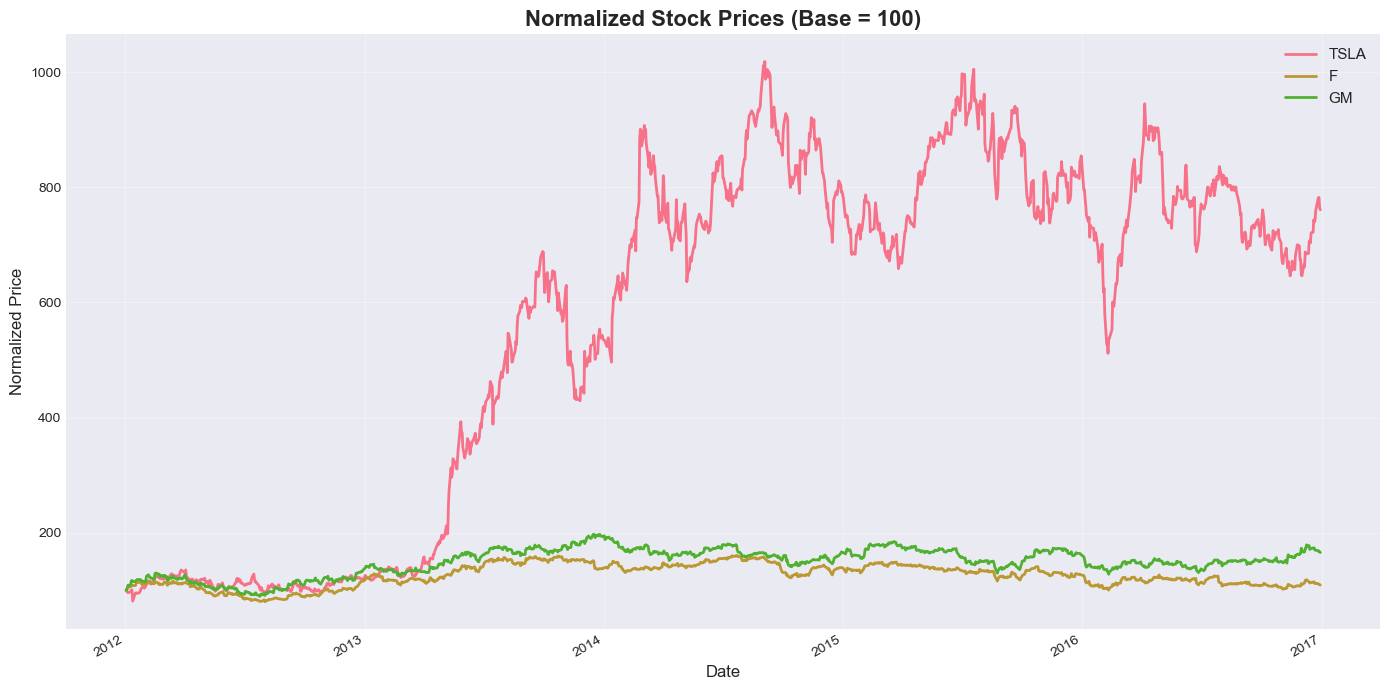


Total Returns over period:
TSLA: 661.00%
F: 8.98%
GM: 65.51%


In [7]:
# Normalize prices to 100 for comparison (relative performance)
# Shows which stock performed best over the period
normalized_portfolio = (portfolio / portfolio.iloc[0]) * 100

# Plot normalized prices
fig, ax = plt.subplots(figsize=(14, 7))
normalized_portfolio.plot(ax=ax, linewidth=2)

ax.set_title('Normalized Stock Prices (Base = 100)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Price', fontsize=12)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate total returns
total_returns = ((portfolio.iloc[-1] / portfolio.iloc[0]) - 1) * 100
print("\nTotal Returns over period:")
for stock, ret in total_returns.items():
    print(f"{stock}: {ret:.2f}%")

## 4. Returns Distribution Analysis

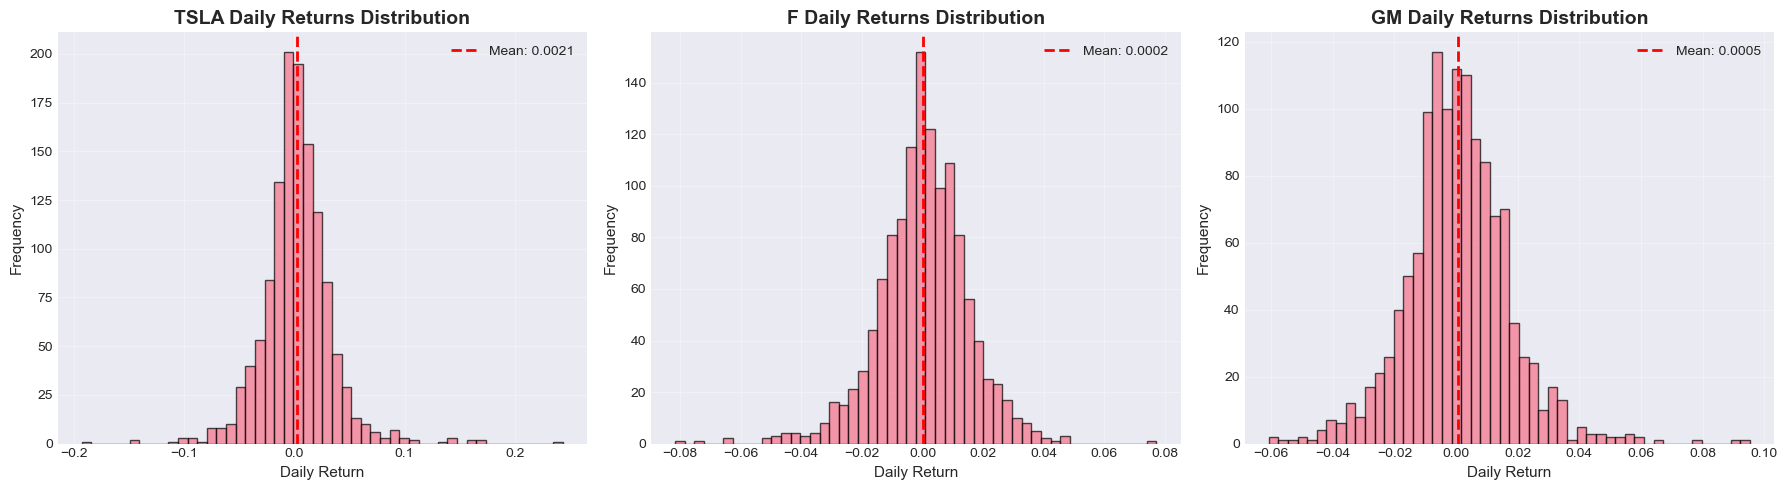


Returns Statistics:


,Mean,Std Dev,Min,Max,Skewness
TSLA,0.002119,0.031908,-0.193274,0.243951,0.622948
F,0.000181,0.014981,-0.081647,0.077220,-0.400994
GM,0.000541,0.016753,-0.060811,0.095361,0.389757


In [12]:
# Plot histograms of daily returns
# Shows the distribution and volatility of each stock
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (col, ax) in enumerate(zip(returns.columns, axes)):
    returns[col].hist(bins=50, alpha=0.7, ax=ax, edgecolor='black')
    ax.set_title(f'{col} Daily Returns Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Daily Return', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.axvline(returns[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns[col].mean():.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display key statistics
print("\nReturns Statistics:")
print("="*60)
stats = pd.DataFrame({
    'Mean': returns.mean(),
    'Std Dev': returns.std(),
    'Min': returns.min(),
    'Max': returns.max(),
    'Skewness': returns.skew(),

})
display(stats)

## 5. Correlation Analysis

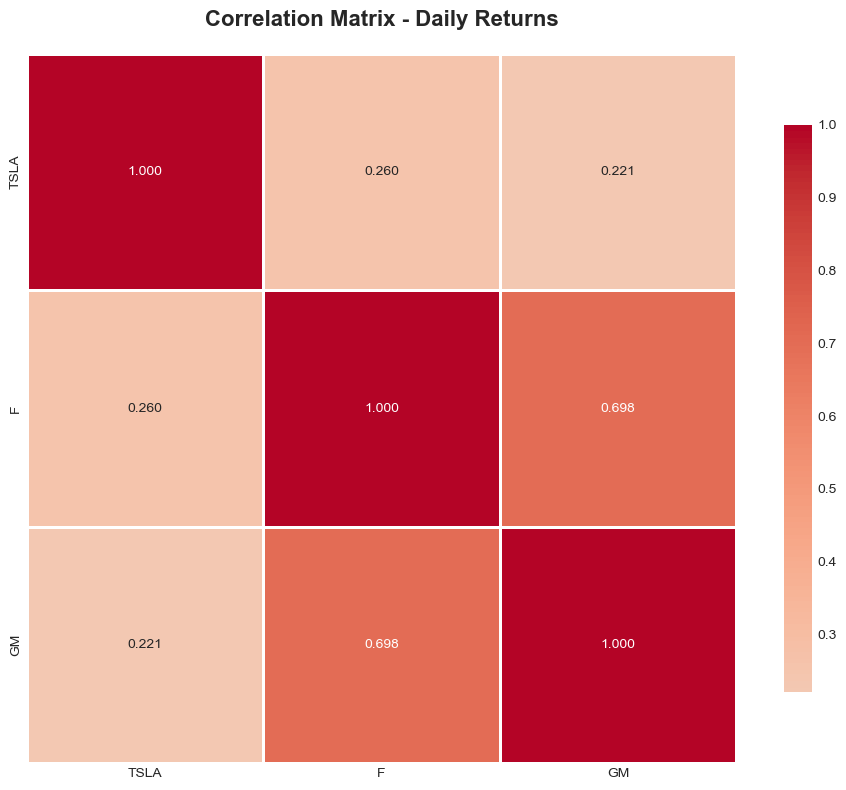


Correlation Interpretation:
- Values close to 1: Strong positive correlation (move together)
- Values close to -1: Strong negative correlation (move opposite)
- Values close to 0: Little to no correlation (good for diversification)


In [9]:
# Calculate correlation matrix
# Shows how stocks move together (diversification insights)
correlation_matrix = returns.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Correlation Matrix - Daily Returns', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation Interpretation:")
print("- Values close to 1: Strong positive correlation (move together)")
print("- Values close to -1: Strong negative correlation (move opposite)")
print("- Values close to 0: Little to no correlation (good for diversification)")

## 6. Pairplot Analysis

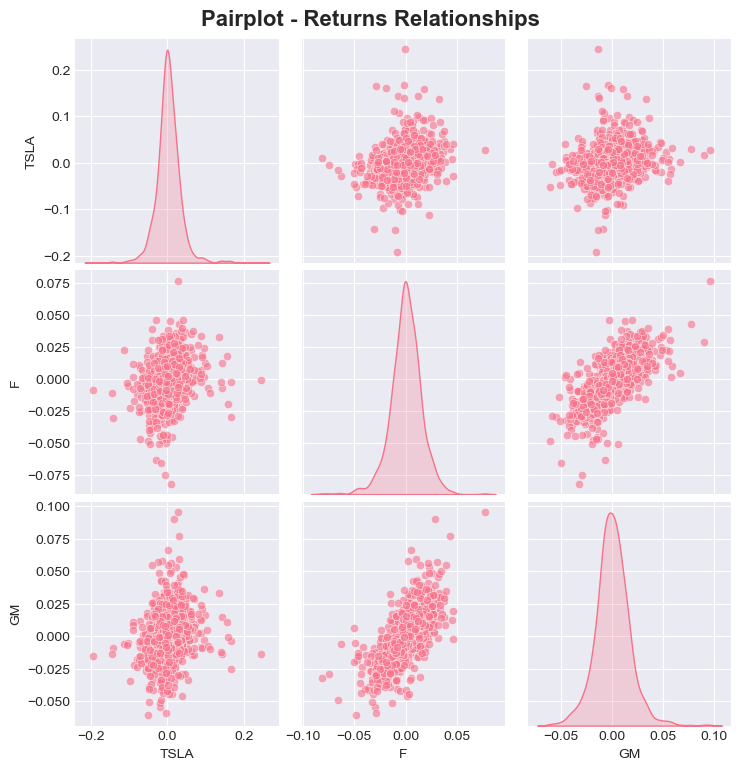

In [10]:
# Create pairplot to visualize relationships between all stocks
# Diagonal: distribution of each stock's returns
# Off-diagonal: scatter plots showing correlation
pairplot_fig = sns.pairplot(returns, diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot_fig.fig.suptitle('Pairplot - Returns Relationships', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 7. Risk-Return Profile

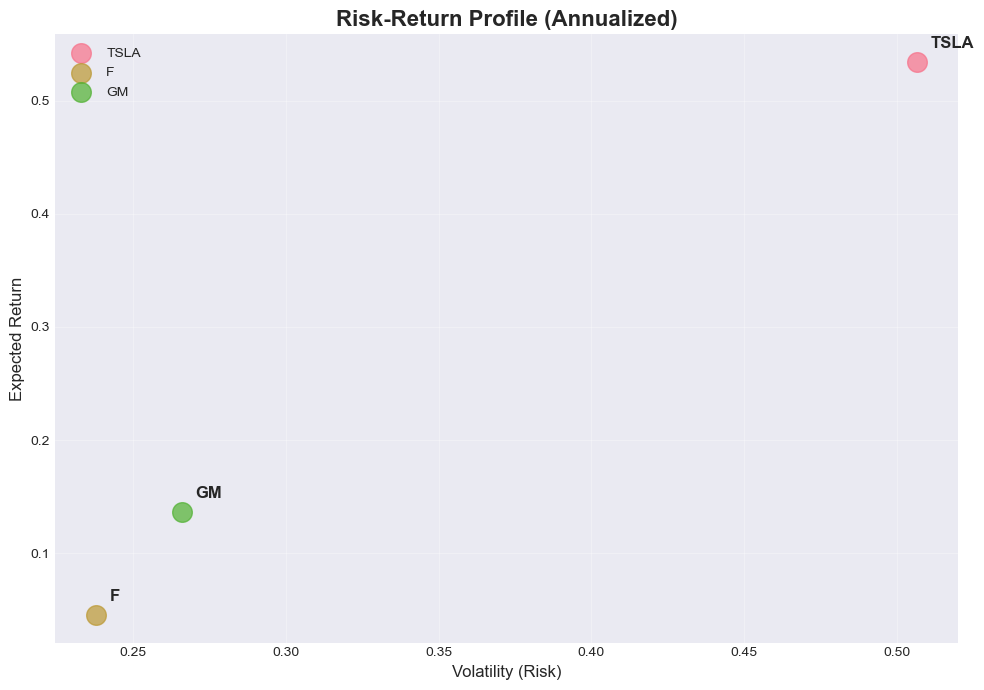


Risk-Return Metrics:


,Annual Return,Annual Volatility,Sharpe Ratio (Rf=0)
TSLA,0.534024,0.506531,1.054277
F,0.045628,0.237811,0.191866
GM,0.136220,0.265939,0.512221


In [11]:
# Calculate annualized metrics
# Assuming 252 trading days per year
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Create risk-return scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

for stock in returns.columns:
    ax.scatter(annual_volatility[stock], annual_return[stock], s=200, alpha=0.7, label=stock)
    ax.annotate(stock, 
                (annual_volatility[stock], annual_return[stock]),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=12,
                fontweight='bold')

ax.set_title('Risk-Return Profile (Annualized)', fontsize=16, fontweight='bold')
ax.set_xlabel('Volatility (Risk)', fontsize=12)
ax.set_ylabel('Expected Return', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

# Display metrics table
risk_return_df = pd.DataFrame({
    'Annual Return': annual_return,
    'Annual Volatility': annual_volatility,
    'Sharpe Ratio (Rf=0)': annual_return / annual_volatility
})

print("\nRisk-Return Metrics:")
display(risk_return_df)

## 8. Conclusions

### Key Findings:
1. **Performance**: Compare which stock had the best risk-adjusted returns
2. **Correlation**: Analyze diversification benefits between stocks
3. **Volatility**: Identify which stock is most/least risky
4. **Distribution**: Check if returns follow normal distribution (important for risk models)

### Next Steps:
- Portfolio optimization (Markowitz efficient frontier)
- VaR (Value at Risk) calculation
- Backtesting trading strategies
- Factor analysis (CAPM, Fama-French)

---
*Note: This analysis is for educational purposes only. Past performance does not guarantee future results.*